 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

""" to ignore warning messages"""
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
# Reading whale returns

"""Specified path of the csv file"""

whale_path = Path("../Starter_Code/Resources/whale_returns.csv")

# reading files as dataframes
"""The dates converted using DateTimeIndex)"""
whale_df = pd.read_csv(whale_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls

whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns

algo_path = Path("../Starter_Code/Resources/algo_returns.csv")

# reading files as dataframes
"""The dates converted using DateTimeIndex)"""
algo_df = pd.read_csv(algo_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_df.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

#### <font color='green'>Algo-2 has 6 null count</font>

In [9]:
# Drop nulls

algo_df = algo_df.dropna().copy()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices

sp500_path = Path("../Starter_Code/Resources/sp_tsx_history.csv")

# reading files as dataframes
"""The dates converted using DateTimeIndex)"""

sp500_df = pd.read_csv(sp500_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check Data Types

sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types


# remove $ character

sp500_df['Close'] = sp500_df['Close'].astype(str).str.replace('$', '')

# removed ','

sp500_df['Close'] = sp500_df['Close'].astype(str).str.replace(',', '')
sp500_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
#  Covert datatype to Float64
sp500_df = sp500_df.astype(np.float64)

"""Validating datatype"""
sp500_df.dtypes

Close    float64
dtype: object

#### <font color='green'>Data type for S&P TRX has been changed to float64</font>

In [14]:
# Calculate Daily Returns

sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# count nulls

sp500_df.isnull().sum()

Close    1
dtype: int64

In [16]:
# Drop nulls

sp500_df = sp500_df.dropna().copy()

In [17]:
# Rename `Close` Column to be specific to this portfolio.


sp500_df.rename(columns = {'Close':'S&P TSX'}, inplace = True)
sp500_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.


combined_df = pd.concat(
    [whale_df, algo_df, sp500_df], axis="columns", join="inner"
)

combined_df.head(6).dropna().copy().sort_values("Date")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

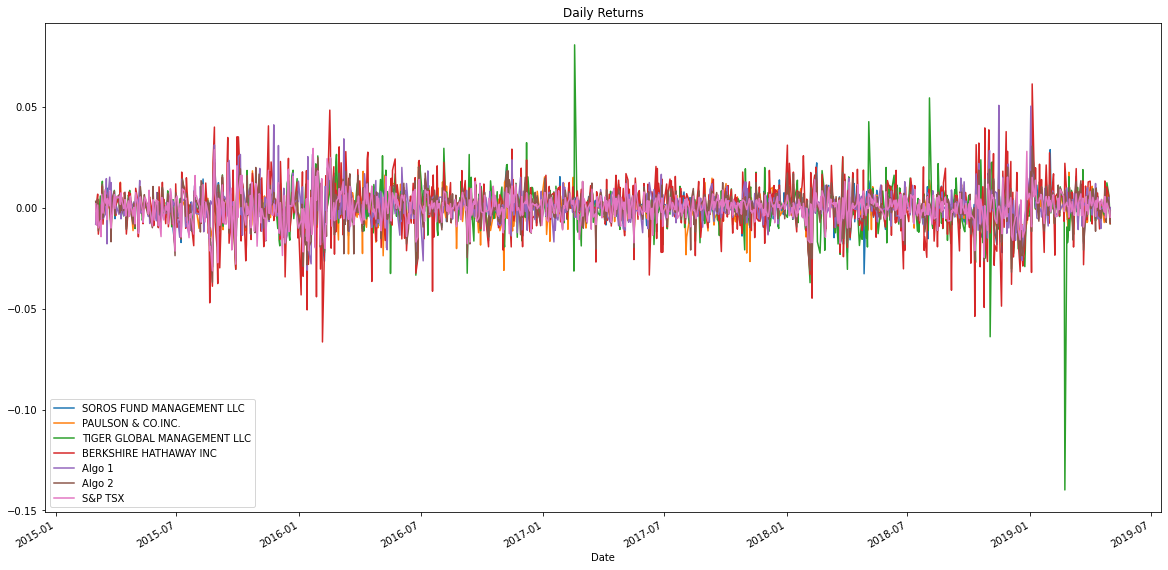

In [19]:
# Plot daily returns of all portfolios

"""Calculated daily returns and then plot it"""

combined_df.plot(title = 'Daily Returns', figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [20]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()-1

cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.010084,0.002247,-0.006596
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.018586,0.004669,-0.009945
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.019524,0.009012,-0.008614
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.024384,-0.002551,-0.018500


<AxesSubplot:xlabel='Date'>

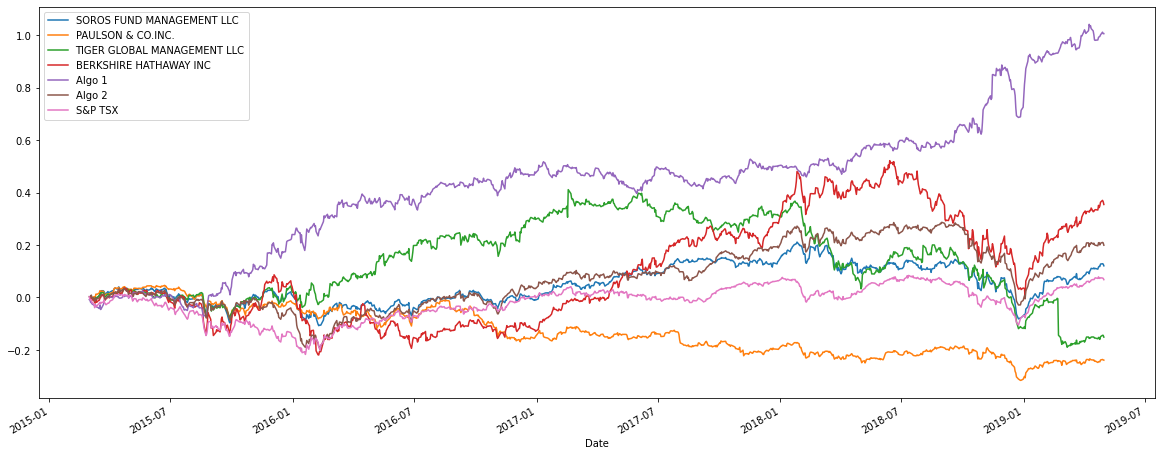

In [21]:
# Plot cumulative returns

cumulative_returns.plot(figsize=(20,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Daily returns')

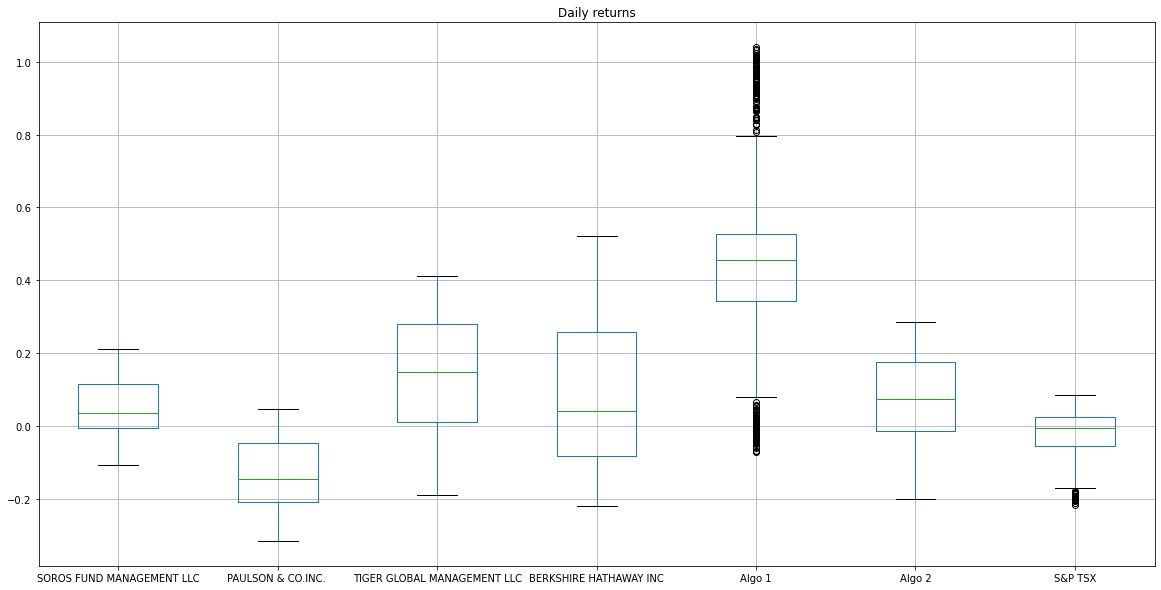

In [22]:
# Box plot to visually show risk

cumulative_returns.boxplot(figsize=(20,10)).set_title("Daily returns")

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios

combined_daily_std = cumulative_returns.std()

""" Daily Standard Deviation in decending order"""

combined_daily_std.sort_values(ascending=False)

Algo 1                         0.256966
BERKSHIRE HATHAWAY INC         0.196871
TIGER GLOBAL MANAGEMENT LLC    0.148722
Algo 2                         0.116945
PAULSON & CO.INC.              0.090735
SOROS FUND MANAGEMENT LLC      0.070271
S&P TSX                        0.064451
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60


sp500_std = cumulative_returns['S&P TSX'].std()
sp500_std 

0.06445091069122708

In [76]:
# Determine which portfolios are riskier than the S&P TSX 60

i = 0
for portfolio in combined_daily_std:
    if portfolio > combined_daily_std["S&P TSX"]:
        print(combined_daily_std.index[i])
    i += 1

SOROS FUND MANAGEMENT LLC
PAULSON & CO.INC. 
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2


#### <font color='green'>This shows that TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1 and, Algo 2 are riskier than S&P 500</font>

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = combined_daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
BERKSHIRE HATHAWAY INC         3.125227
Algo 1                         4.079217
Algo 2                         1.856447
S&P TSX                        1.023126
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

cumulative_returns.rolling(window=21).std()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.010084,0.002247,-0.006596
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.018586,0.004669,-0.009945
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.019524,0.009012,-0.008614
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.024384,-0.002551,-0.018500


<AxesSubplot:xlabel='Date'>

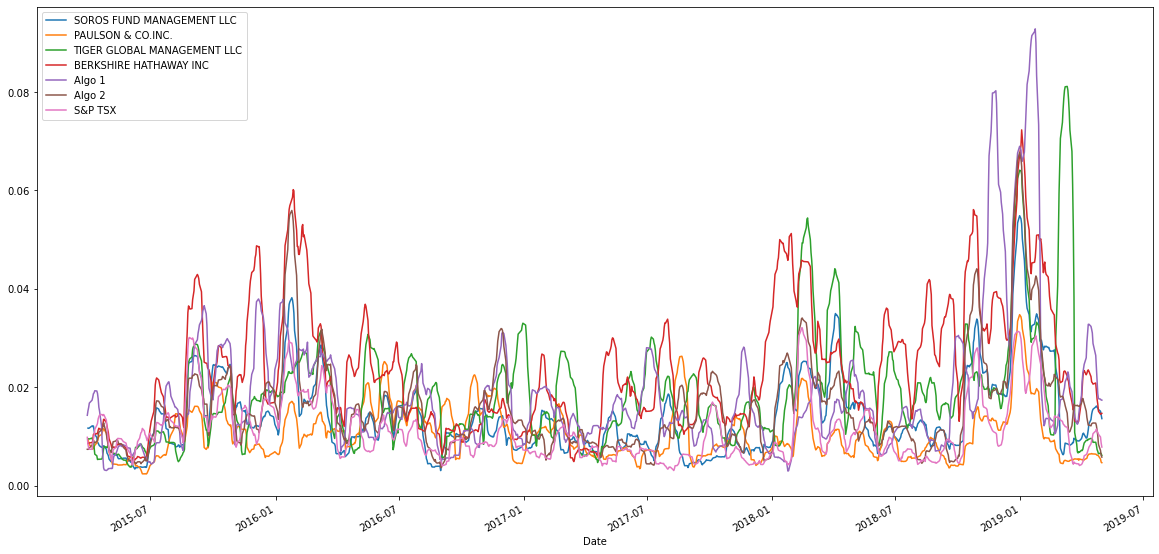

In [28]:
# Plot the rolling standard deviation

cumulative_returns.rolling(window=21).std().plot(figsize=(20,10))

#### <font color='green'> The standard deviation indicator above shows the volatility, charted for 21 days.</font>

### Calculate and plot the correlation

In [75]:
# Calculate the correlation

correlation_df = combined_df.corr()
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


<AxesSubplot:>

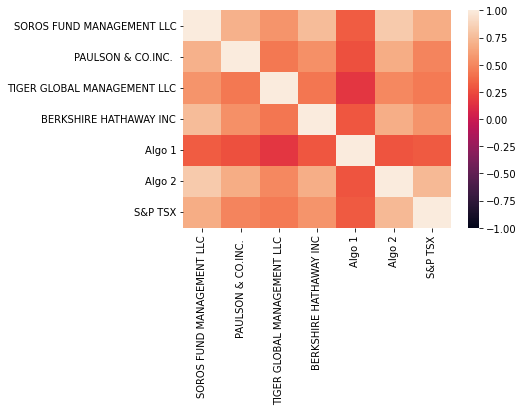

In [30]:
# Display de correlation matrix

import seaborn as sns

"""Use the `heatmap` function from the seaborn library to visualize correlation matrix, seaborn imported"""

sns.heatmap(correlation_df, vmin=-1, vmax=1)

#### <font color='green'> The value of correlation above ranges from -1 to +1. Algo 1 Correlation indicates that it is mostly independent of other stocks.</font>

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [31]:
# Calculate covariance of a single portfolio

covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['S&P TSX'])
covariance

5.027336077110013e-05

In [32]:
# Calculate variance of S&P TSX

variance = combined_df['S&P TSX'].var()
variance

4.9434802530161176e-05

In [33]:
# Computing beta

beta = covariance / variance
beta

1.0169629127258542

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of BERKSHIRE HATHAWAY INC Returns vs. S&P TSX Returns'}, xlabel='Date'>

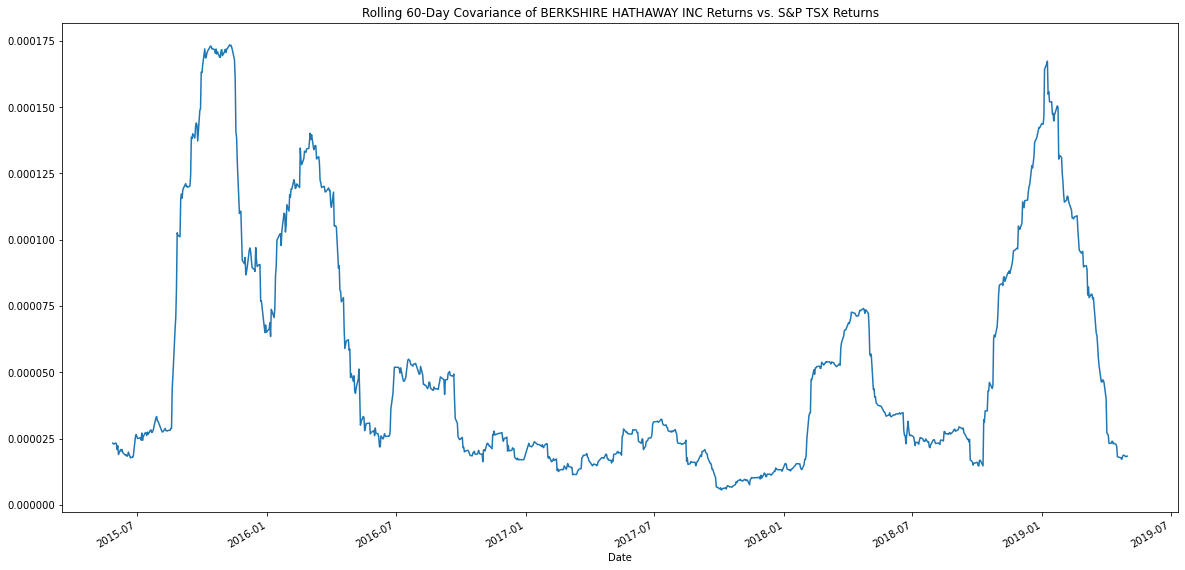

In [34]:
# 60 Days Rolling Covariance of BERKSHIRE HATHAWAY INC Returns vs. S&P TSX Returns

rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P TSX'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of BERKSHIRE HATHAWAY INC Returns vs. S&P TSX Returns')

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P TRX Returns'}, xlabel='Date'>

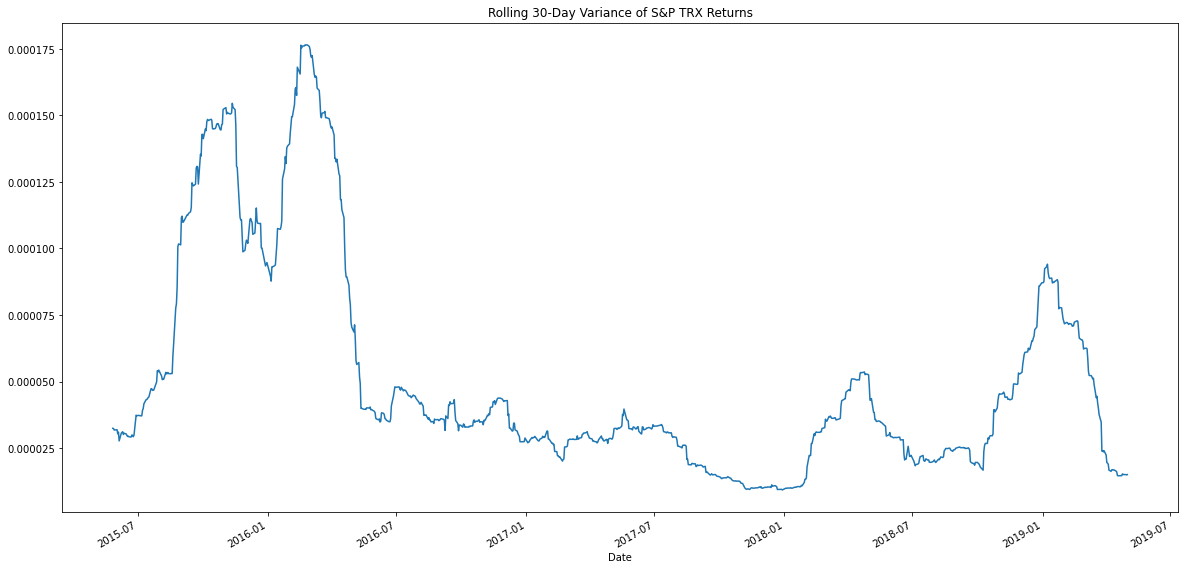

In [35]:
# Calculate 60-day rolling variance of BERKSHIRE HATHAWAY INC Returns vs. S&P TSX Returns and plot the data

rolling_variance = combined_df['S&P TSX'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P TRX Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

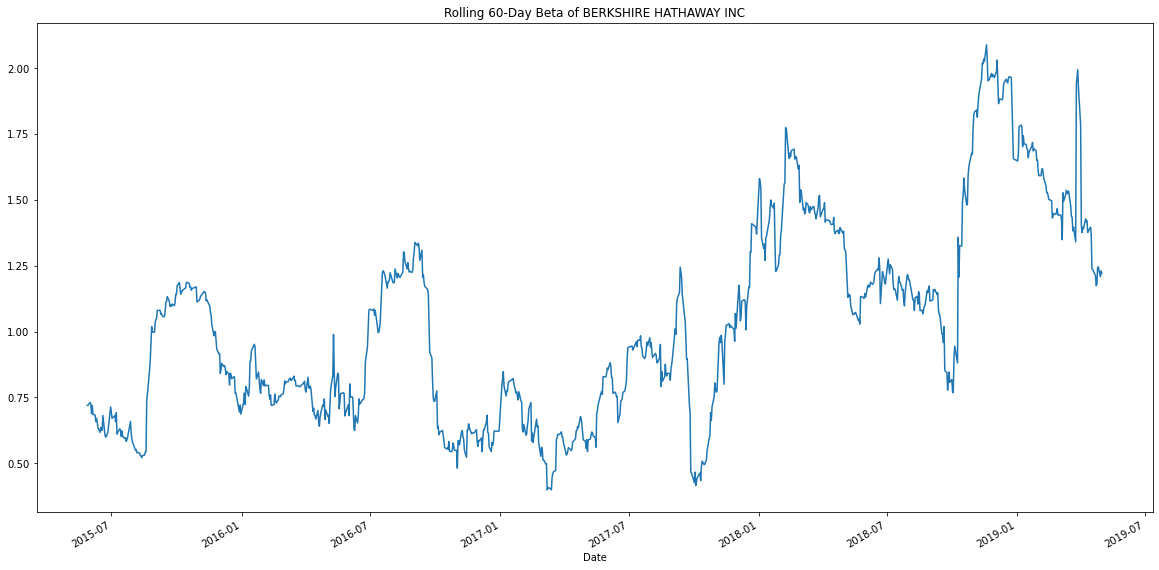

In [36]:
# Calculate 30-day rolling beta of BERKSHIRE HATHAWAY INC and plot the data

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

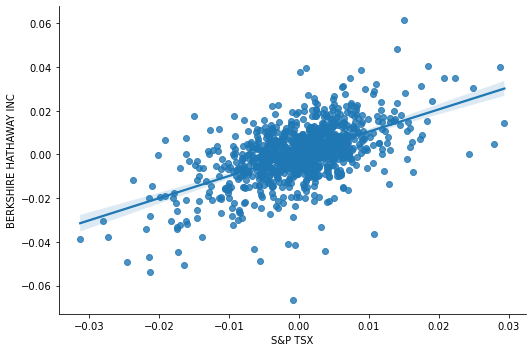

In [37]:
# Plot beta trend

sns.lmplot(x='S&P TSX', y='BERKSHIRE HATHAWAY INC', data=combined_df, aspect=1.5, fit_reg=True)

#### <font color='green'> Beta for Berkshire hathaway and S&P TSX suggest that the Berkshire hathaway's stock has been beta less than 1.0 which indicated low volatility i.e. the risk is low, and so is the retuns and at times lower than the market </font>

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [74]:
# Use `ewm` to calculate the rolling window
"""Optional Activity"""

ewm_df = combined_df.ewm(span=21, adjust=False).std()

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

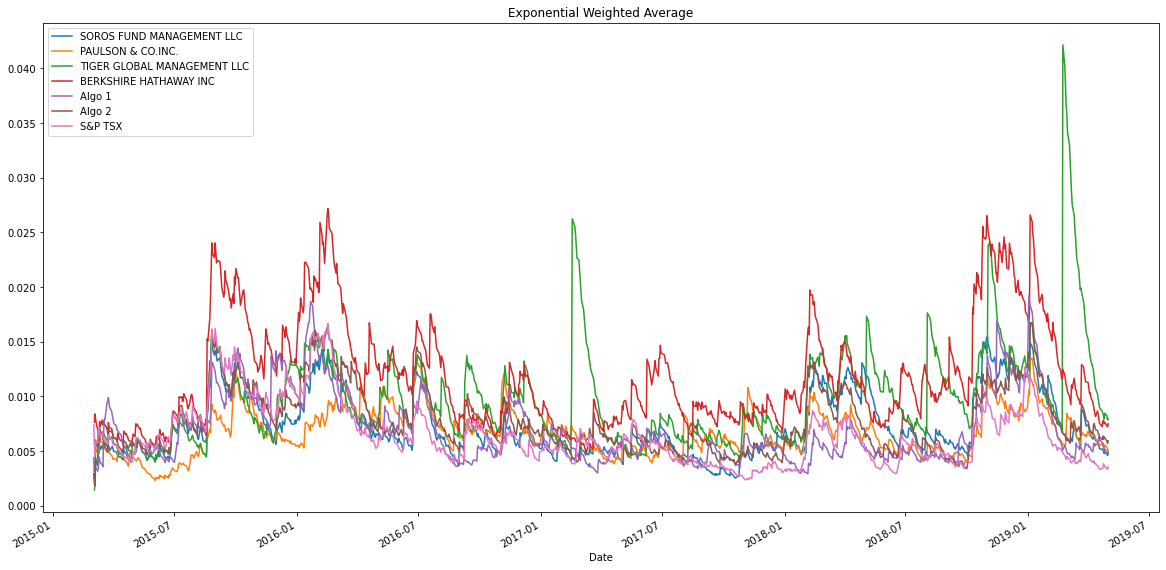

In [73]:
# EWM Plot

ewm_df.plot(title = "Exponential Weighted Average", figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios

sharpe_ratios = ((combined_df.mean()-combined_df['S&P TSX'].mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.107310
PAULSON & CO.INC.             -0.748710
TIGER GLOBAL MANAGEMENT LLC   -0.273490
BERKSHIRE HATHAWAY INC         0.357556
Algo 1                         1.288229
Algo 2                         0.233802
S&P TSX                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

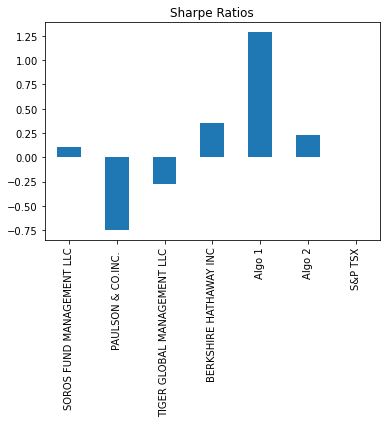

In [40]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---
#### <font color='green'>Looking at the charts, it is clear that Algorithmic strategies outperformed whales portfolio and S&P TSX 600, except 'Berkshire Hathaway Inc, which did better than Alfo 2.</font>

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [41]:
# Reading data from 1st stock

apple_path = Path("../Starter_Code/Resources/aapl_returns.csv")

apple_df = pd.read_csv(apple_path, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [42]:
# Reset Date index
apple_df.rename(columns = {'Close':'AAPL'}, inplace = True)

apple_df.head()

,AAPL
Date,
2018-02-01 16:00:00,43.07
2018-03-01 16:00:00,43.06
2018-04-01 16:00:00,43.26
2018-05-01 16:00:00,43.75
2018-08-01 16:00:00,43.59


In [43]:
# Reading data from 2nd stock

amazon_path = Path("../Starter_Code/Resources/amzn_returns.csv")

amazon_df = pd.read_csv(amazon_path, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [44]:
# Reset Date index
amazon_df.rename(columns = {'Close':'AMZN'}, inplace = True)

amazon_df.head()

,AMZN
Date,
2018-02-01 16:00:00,1189.01
2018-03-01 16:00:00,1204.20
2018-04-01 16:00:00,1209.59
2018-05-01 16:00:00,1229.14
2018-08-01 16:00:00,1246.87


In [45]:
# Reading data from 3rd stock

google_path = Path("../Starter_Code/Resources/goog_returns.csv")

google_df = pd.read_csv(google_path, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [46]:
# Reset Date index

google_df.rename(columns = {'Close':'GOOG'}, inplace = True)

google_df.head()

,GOOG
Date,
2018-02-01 16:00:00,1189.01
2018-03-01 16:00:00,1204.20
2018-04-01 16:00:00,1209.59
2018-05-01 16:00:00,1229.14
2018-08-01 16:00:00,1246.87


In [47]:
# Combine all stocks in a single DataFrame

common_df = pd.concat(
    [apple_df, amazon_df, google_df], axis="columns", join="inner"
)
common_df.head()

,AAPL,AMZN,GOOG
Date,,,
2018-02-01 16:00:00,43.07,1189.01,1189.01
2018-03-01 16:00:00,43.06,1204.20,1204.20
2018-04-01 16:00:00,43.26,1209.59,1209.59
2018-05-01 16:00:00,43.75,1229.14,1229.14
2018-08-01 16:00:00,43.59,1246.87,1246.87


In [48]:
# Reset Date index

""" Date Index Reset above"""

' Date Index Reset above'

In [49]:
# Reorganize portfolio data by having a column per symbol



# Calculate daily returns

common_df = common_df.pct_change()
common_df.head()

In [50]:
# count NAs

common_df.isnull().sum()

AAPL    0
AMZN    0
GOOG    0
dtype: int64

In [51]:
# Drop NAs

common_df = common_df.dropna().copy()

# count if NA dropped
common_df.isnull().sum()

AAPL    0
AMZN    0
GOOG    0
dtype: int64

In [52]:
# Display sample data
common_df.head()

,AAPL,AMZN,GOOG
Date,,,
2018-02-01 16:00:00,43.07,1189.01,1189.01
2018-03-01 16:00:00,43.06,1204.20,1204.20
2018-04-01 16:00:00,43.26,1209.59,1209.59
2018-05-01 16:00:00,43.75,1229.14,1229.14
2018-08-01 16:00:00,43.59,1246.87,1246.87


In [53]:
# Normalise datetime

common_df.index = common_df.index.normalize()

common_df.head()

,AAPL,AMZN,GOOG
Date,,,
2018-02-01,43.07,1189.01,1189.01
2018-03-01,43.06,1204.20,1204.20
2018-04-01,43.26,1209.59,1209.59
2018-05-01,43.75,1229.14,1229.14
2018-08-01,43.59,1246.87,1246.87


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [54]:
# Set weights
# weights = [1/3, 1/3, 1/3]

aapl_weight = 1/3
amzn_weight = 1/3
goog_weight = 1/3

In [55]:
# Calculate portfolio return

portfolio_returns = aapl_weight * common_df["AAPL"] + amzn_weight * common_df["AMZN"] + goog_weight * common_df["GOOG"]

# Display sample data

portfolio_returns.head(10)

Date
2018-02-01    807.030000
2018-03-01    817.153333
2018-04-01    820.813333
2018-05-01    834.010000
2018-08-01    845.776667
2018-09-01    849.660000
2018-10-01    850.743333
2018-11-01    865.726667
2018-12-01    884.890000
2018-01-16    884.590000
dtype: float64

In [56]:
# Extra - Shortcut for calculating returns
""" alternatively, weighted returns can be calculated using the shortcut method"""

weights = [1/3, 1/3, 1/3]
portfolio_returns = common_df.dot(weights)
portfolio_returns.head(10)

Date
2018-02-01    807.030000
2018-03-01    817.153333
2018-04-01    820.813333
2018-05-01    834.010000
2018-08-01    845.776667
2018-09-01    849.660000
2018-10-01    850.743333
2018-11-01    865.726667
2018-12-01    884.890000
2018-01-16    884.590000
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [57]:
# Join your returns DataFrame to the original returns DataFrame

"""Calculate daily returns for new dataframe"""

common_df = common_df.pct_change()
common_df.head()

,AAPL,AMZN,GOOG
Date,,,
2018-02-01,NaN,NaN,NaN
2018-03-01,-0.000232,0.012775,0.012775
2018-04-01,0.004645,0.004476,0.004476
2018-05-01,0.011327,0.016163,0.016163
2018-08-01,-0.003657,0.014425,0.014425


In [58]:
joined_df = pd.concat(
    [common_df, combined_df], axis="columns", join="inner"
)
joined_df.head()

,AAPL,AMZN,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,,,
2018-02-01,NaN,NaN,NaN,-0.002085,0.000545,0.001500,-0.014410,-0.004299,0.003629,-0.005689
2018-03-01,-0.000232,0.012775,0.012775,-0.008892,-0.002514,-0.004376,-0.010229,0.005933,-0.006601,-0.003156
2018-05-01,0.011327,0.016163,0.016163,0.008046,0.001157,-0.006231,0.005326,0.001589,0.002106,0.000708
2018-08-01,-0.003657,0.014425,0.014425,-0.015330,-0.005112,-0.011223,0.000135,0.006178,-0.002942,-0.003483
2018-10-01,-0.000229,0.001301,0.001301,-0.004046,0.000251,0.006181,-0.005250,-0.002388,-0.001319,0.001947


In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

joined_df.isnull().sum()

AAPL                           1
AMZN                           1
GOOG                           1
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

In [60]:
# drop null

joined_df.dropna(axis = 0, inplace = True)

In [61]:
joined_df.head()

,AAPL,AMZN,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,,,
2018-03-01,-0.000232,0.012775,0.012775,-0.008892,-0.002514,-0.004376,-0.010229,0.005933,-0.006601,-0.003156
2018-05-01,0.011327,0.016163,0.016163,0.008046,0.001157,-0.006231,0.005326,0.001589,0.002106,0.000708
2018-08-01,-0.003657,0.014425,0.014425,-0.015330,-0.005112,-0.011223,0.000135,0.006178,-0.002942,-0.003483
2018-10-01,-0.000229,0.001301,0.001301,-0.004046,0.000251,0.006181,-0.005250,-0.002388,-0.001319,0.001947
2018-11-01,0.005738,0.017818,0.017818,0.015545,0.022372,0.022348,0.020185,0.028359,0.019114,0.008176


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized `std`

""" Daily std"""

joined_std = joined_df.std()

In [63]:
""" Annualised std"""

joined_annual_std = joined_std * np.sqrt(252)
joined_annual_std.head()

AAPL                         0.276442
AMZN                         0.358907
GOOG                         0.358907
SOROS FUND MANAGEMENT LLC    0.157472
PAULSON & CO.INC.            0.117017
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [64]:
# Calculate rolling standard deviation

joined_df_21std = joined_df.rolling(window=21).std()

<AxesSubplot:xlabel='Date'>

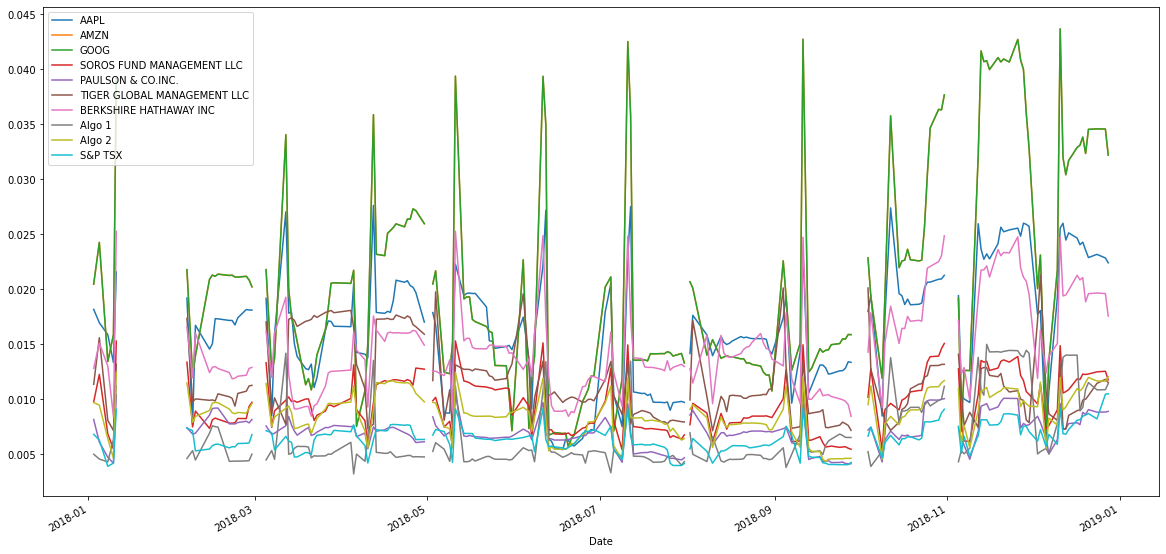

In [65]:
# Plot rolling standard deviation

joined_df_21std.plot(figsize=(20, 10))

### Calculate and plot the correlation

In [66]:
# Calculate and plot the correlation

joined_corr_df = joined_df.corr()

<AxesSubplot:>

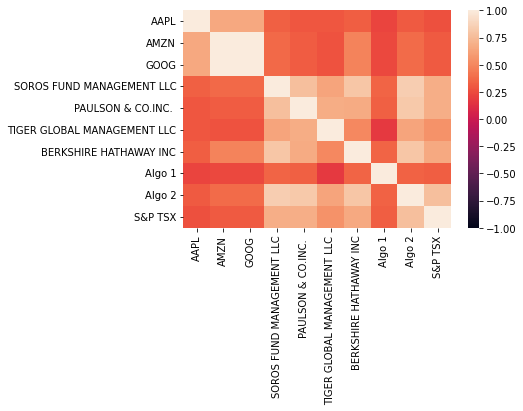

In [67]:
# Plot correlation using `heatmap` function 

sns.heatmap(joined_corr_df, vmin=-1, vmax=1)

#### <font color='green'>Correlation matrix above shows the correlation between the returns from original portfolio and S&P TSX, wherein it is quite visible that new portfolio fared mostly better than the original portfolio. </font>

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [68]:
# Calculate and plot Beta

# Calculate variance
rolling_variance = joined_df["S&P TSX"].rolling(window=60).var()



# calculate covariance
rolling_aapl_covariance = joined_df["AAPL"].rolling(window=60).cov(joined_df["S&P TSX"])
rolling_amzn_covariance = joined_df["AMZN"].rolling(window=60).cov(joined_df["S&P TSX"])
rolling_goog_covariance = joined_df["GOOG"].rolling(window=60).cov(joined_df["S&P TSX"])

# calculate beta

rolling_aapl_beta = rolling_aapl_covariance / rolling_variance
rolling_amzn_beta = rolling_amzn_covariance / rolling_variance
rolling_goog_beta = rolling_goog_covariance / rolling_variance

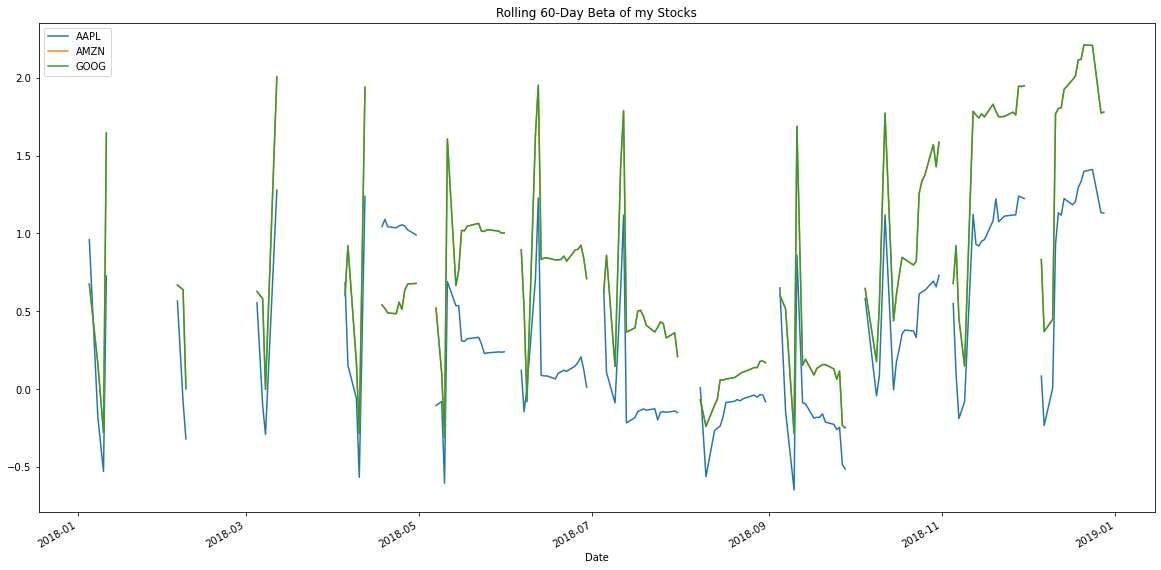

In [69]:
# Plot Beta

ax = rolling_aapl_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of my Stocks")
rolling_amzn_beta.plot(ax=ax)
rolling_goog_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["AAPL", "AMZN", "GOOG"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Calculate Annualized Sharpe Ratios

sharpe_ratios_2 = ((joined_df.mean()-joined_df['S&P TSX'].mean()) * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios_2



AAPL                          -0.158347
AMZN                           0.879754
GOOG                           0.879754
SOROS FUND MANAGEMENT LLC     -0.473338
PAULSON & CO.INC.             -0.406528
TIGER GLOBAL MANAGEMENT LLC   -1.065108
BERKSHIRE HATHAWAY INC        -0.428218
Algo 1                         2.340788
Algo 2                        -0.715164
S&P TSX                        0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

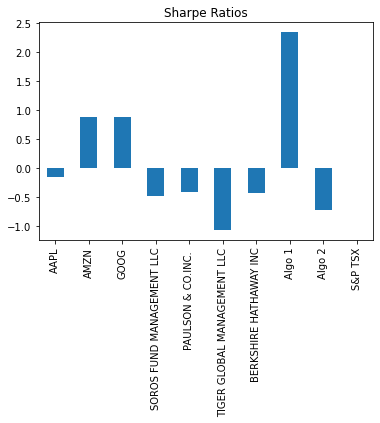

In [71]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios_2.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

#### <font color='green'> Portfolio performed better than previous portfolio, except for Algo 1. </font>
